Программа создана для Python2.7

### Что необходимо для использования этой программы
Необходимы 3 папки: input, ouput, modes.
В папке input хранятся первичные данные, которые необходимо обработать.
В папке ouput сохраняются обработанные данные (картинки и таблицы с полученными числами).
В папке modes хранятся дополнительные данные для обработки эксперимента. Это файл формата xlsx, содержащий слудющие столбцы: "mode" - номер режима;"B, [A]" - магнитное поле;"r, [cm]" - расстояние от центра;"U, [V]" - напряжение на катодах;"name" - название папки в которой хранятся данные;"div" - делитель. Обязательным является наличие столбца "name" и "div", все остальные столбцы имеют лишь справочный характер и в таком же виде переносятся в файл с результатами.
##### Внимание!!
Эта программа была создана для обработки данных, полученных с портативного осциллографа актаком. В связи с этим конфигурация входных данных имеет следующий вид: в одной папке (в моем случае EmissiveProbe) хранятся все три папки input, output, modes. В папке ipnut находятся папки с названием folder_name серии эксперимента (обычно это дата), в нем хранятся папки с названиеми "name", в которых находятся эксельки отличающиеся ТОЛЬКО ТОКОМ НАГРЕВА спирали. Название экселек не имеет значения. В папке output должна находиться папка с таким же названием folder_name, в которую в последствии запишутся все обработанные данные. Название xlsx файла в modes должно также совпадать с folder_name.

В результате работы программы в папке \output\folder_name будут сохранены графики и экселька с названием Results. В этой эксельке каждой странице соответствуют данные, полученные из одной папки name. Последняя страница с названием modes содержит сводную информавию по всему эксперименту.

### Извлечение библиотек

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pand

### Извлечение основной информации из modes

In [3]:
os.chdir('C:\\Users\\Yaroslav\\YandexDisk\\Pr\\Py\\lab\\EmissiveProbe\\modes') # Заходим в папку modes
print 'Введите название папки в input, которая должна совпадать с названием соответствующего файла в modes'
folder_name=raw_input(); mode_name = folder_name;
# Устанавливаем пути входных и выходных данных
set_input = 'C:\\Users\\Yaroslav\\YandexDisk\\Pr\\Py\\lab\\EmissiveProbe\\input\\' + folder_name
set_output = 'C:\\Users\\Yaroslav\\YandexDisk\\Pr\\Py\\lab\\EmissiveProbe\\output\\' + folder_name
# Считываем данные из файла в modes
modeData=pand.read_excel('%s.xlsx' % mode_name,sep=' ')
print 'В данном файле содержится информация о', modeData['name'].size, 'графиках.','\n', 'Обработать все? No=0;Yes=1'
if input()==0:
    print modeData, '\n', 'Введите через запятую индексы графиков, которые вы хотите обработать.'
    ind=pand.Series(input());
else:
    ind=pand.Series(range(0,modeData['name'].size))

print 'Убедитесь, что в папке output есть папка с названием', mode_name

Введите название папки в input, которая должна совпадать с названием соответствующего файла в modes
8.06
В данном файле содержится информация о 13 графиках. 
Обработать все? No=0;Yes=1
0
    mode  B, [A]  r, [cm]  U, [V]  name  div
0      1     300       25     NaN     1    1
1      1     300       23     NaN     2    1
2      1     300       20     NaN     3    1
3      1     300       18     NaN     4    1
4      1     300       15     NaN     5    1
5      1     300       10     NaN     6    1
6      1     300        6     NaN     7    1
7      1     300       13     NaN     8    1
8      2      77       33     NaN     9    1
9      2      77       28     NaN    10    1
10     2      77       22     NaN    11    1
11     2      77       14     NaN    12    1
12     2      77        8     NaN    13    1 
Введите через запятую индексы графиков, которые вы хотите обработать.
2,5,8
Убедитесь, что в папке output есть папка с названием 8.06


### Определение функций

In [6]:
def save(name='',fmt=''): # функция для сохранения картинок
    pwd = os.getcwd()
    plt.savefig('%s.%s' % (name,fmt), fmt='', dpi=1000)
    os.chdir(pwd)

def NamesList(name, folder_name): # Возвращает массив имен всех экселек в папке .\folder_name\name
    namesXLS = []
    for i in os.listdir('C:\\Users\\Yaroslav\\YandexDisk\\Pr\\Py\\lab\\EmissiveProbe\\input\\' + folder_name + '\\' + str(name)):
        if ((i[-3:] == 'xls') or (i[-4:] == 'xlsx')):
            namesXLS.append(i)
    return namesXLS

def openData(nameXLS, name, folder_name, div): # Открывает эксельку и возвращает два np.array X, Y
    # Переходим в папку name
    os.chdir('C:\\Users\\Yaroslav\\YandexDisk\\Pr\\Py\\lab\\EmissiveProbe\\input\\' + folder_name + '\\' + str(name))
    # Считываем файл nameXLS в dataframe
    data = pand.read_excel(nameXLS)
    # Если файлы обработаны через родную актакомовскую прогу, то исходный файл имеет разрешение xls и две колонки,
    # а если через программу openBin, то разрешение xlsx и только одну колонку.
    # В связи с этим тут представленно два различных случая.
    if (len(data.columns) == 1):
        return np.array(range(len(data))) / 1000., np.array(data[data.columns[0]]) / (1000. * div)
        # Все делим на тысячу, т.к. представленные данные всегда представленны в [мВ] и [мс]
    else:
        return np.array(data[data.columns[0]]) / 1000., np.array(data[data.columns[1]]) / (1000. * div)

def points(dataX, dataY, dY): 
    # Функция, которая возвращает среднее значение наибольшего и наименьшего значения обрезанного синуса.
    # Т.е. фактически положение плавающего потенциала и тока нагрева.
    mnY = min(dataY); mxY = max(dataY)
    number = []
    for i in np.linspace(mnY, mxY - dY, int(abs(mxY-mnY)/dY)):
        number.append(len(dataY[dataY < i + dY]))
    grad = np.gradient(number)
    return mnY + np.argmax(grad[:len(grad) / 2]) * dY, mnY + (len(grad) / 2 + np.argmax(grad[len(grad) / 2:])) * dY

def sampleRate(dataY): # Находит частоту дискретизации
    sortY = np.sort(dataY)
    return max(sortY[1:] - sortY[:-1])

def PlatoPeaks(minY, maxY, dataY, dataX, dYup, dYdown): # Выдает масивы данных назодящихся в окресности dYup, dYdown найденных средних minY, maxY
    platoY = dataY[(dataY > maxY - dYup)&(dataY < maxY + dYup)]
    platoX = dataX[(dataY > maxY - dYup)&(dataY < maxY + dYup)]
    peakY = dataY[(dataY > minY - dYdown)&(dataY < minY + dYdown)]
    peakX = dataX[(dataY > minY - dYdown)&(dataY < minY + dYdown)]
    return platoX, platoY, peakX, peakY 
    
def draw(dataX, dataY, platoX, platoY, peakX, peakY): # Рисуем данные с обозначенной областью deltaU
    plt.plot(dataX, dataY, '.b')
    plt.plot(platoX, platoY, '.g')
    plt.plot(peakX, peakY, '.g')
    plt.ylabel('U, [V]')
    plt.xlabel('t, [s]')

def draw1(dataX, dataY, minY, maxY): # Рисуем данные с прямой, проходящей через срение значения
    plt.plot(dataX, dataY, '.b')
    plt.plot(np.linspace(min(dataX), max(dataX), 100), np.ones(100) * maxY, '-r')
    plt.plot(np.linspace(min(dataX), max(dataX), 100), np.ones(100) * minY, '-r')
    plt.ylabel('U, [V]')
    plt.xlabel('t, [s]')

### Основной программный блок

3    0    18-06-08 14_54_58_59.xlsx


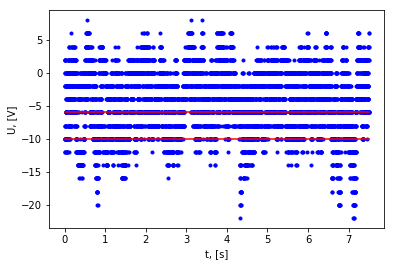

3    1    18-06-08 14_55_01_351.xlsx


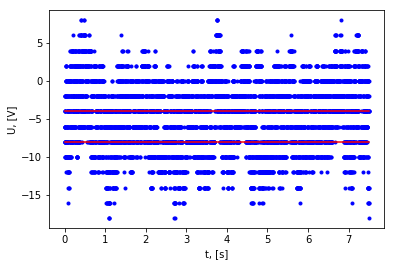

3    2    18-06-08 14_55_04_627.xlsx


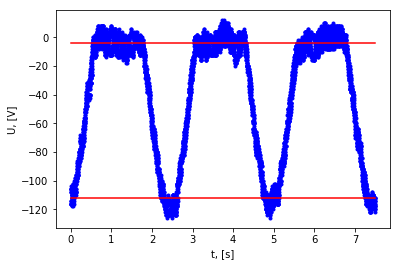

3    3    18-06-08 14_55_07_918.xlsx


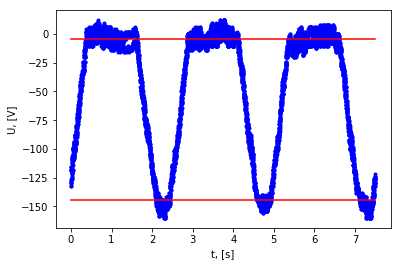

3    4    18-06-08 14_55_11_210.xlsx


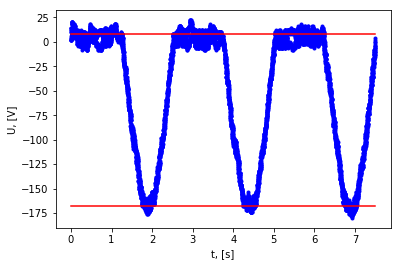

3    5    18-06-08 14_55_14_470.xlsx


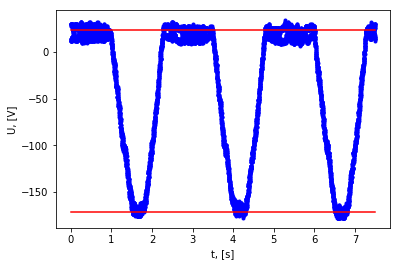

3    6    18-06-08 14_55_17_762.xlsx


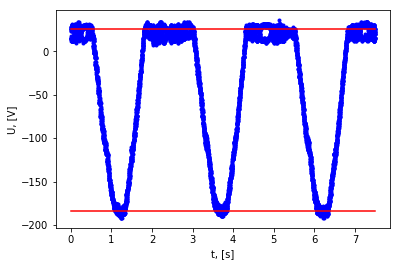

3    7    18-06-08 14_55_21_38.xlsx


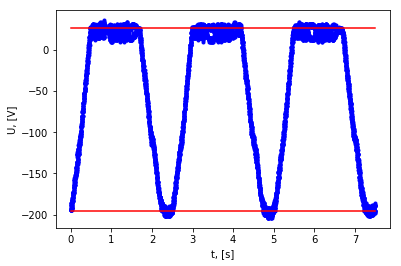

3    8    18-06-08 14_55_24_314.xlsx


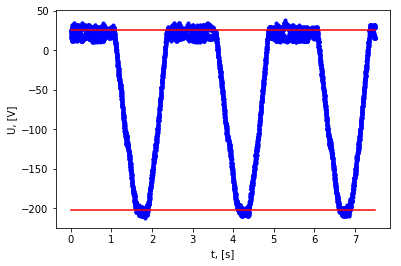

3    9    18-06-08 14_55_27_605.xlsx


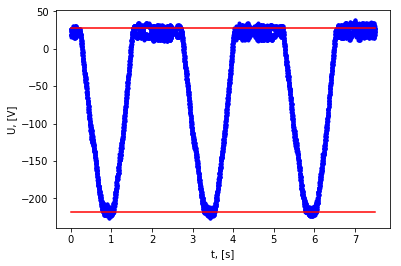

3    10    18-06-08 14_55_30_881.xlsx


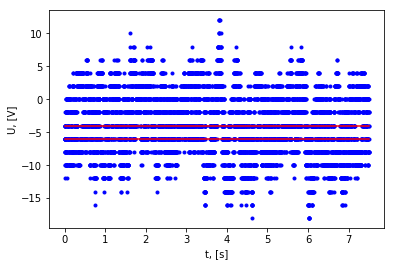

6    0    18-06-08 15_04_35_116.xlsx


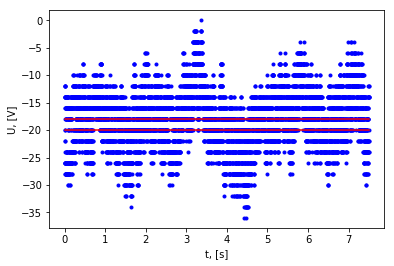

6    1    18-06-08 15_04_38_392.xlsx


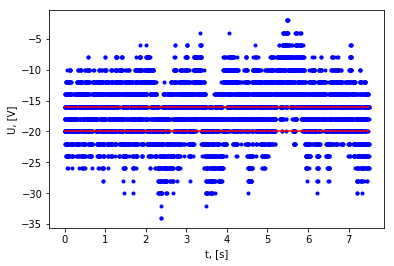

6    2    18-06-08 15_04_41_668.xlsx


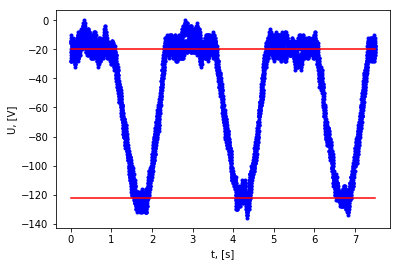

6    3    18-06-08 15_04_44_959.xlsx


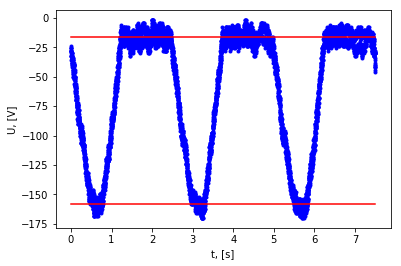

6    4    18-06-08 15_04_48_235.xlsx


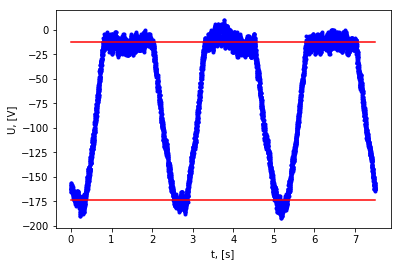

6    5    18-06-08 15_04_51_511.xlsx


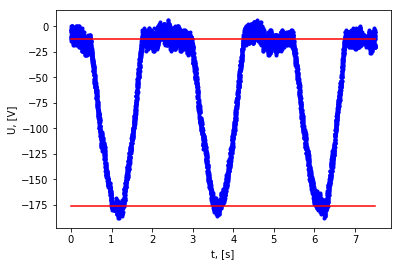

6    6    18-06-08 15_04_54_803.xlsx


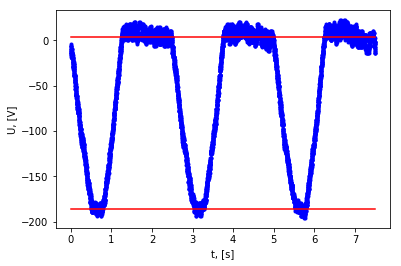

6    7    18-06-08 15_04_58_79.xlsx


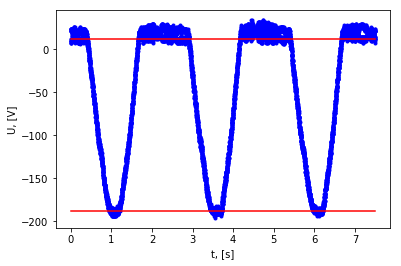

6    8    18-06-08 15_05_01_355.xlsx


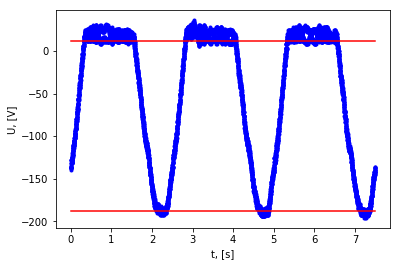

6    9    18-06-08 15_05_04_646.xlsx


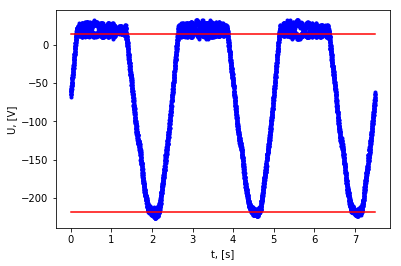

6    10    18-06-08 15_05_07_922.xlsx


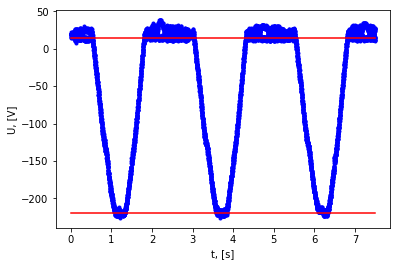

6    11    18-06-08 15_05_11_199.xlsx


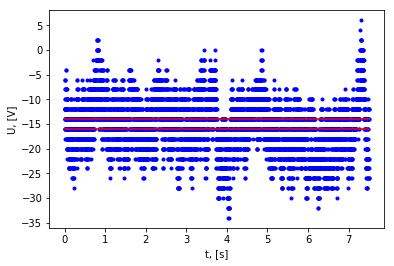

9    0    18-06-08 17_41_21_610.xlsx


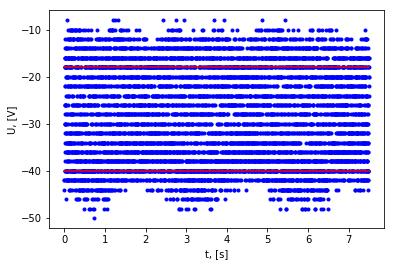

9    1    18-06-08 17_41_24_901.xlsx


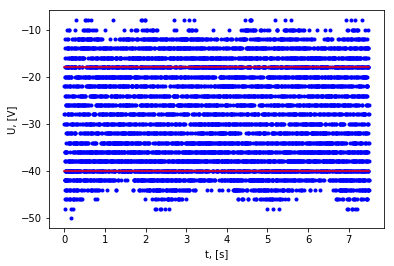

9    2    18-06-08 17_41_28_177.xlsx


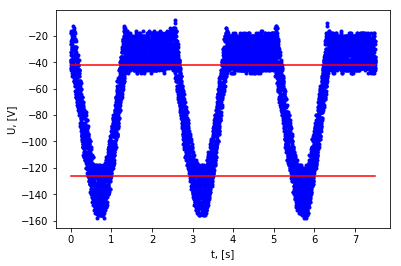

9    3    18-06-08 17_41_31_453.xlsx


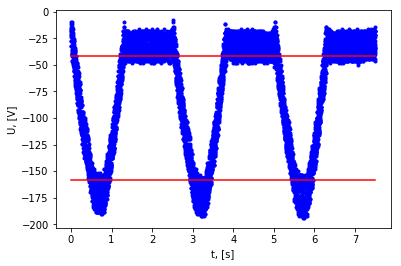

9    4    18-06-08 17_41_34_745.xlsx


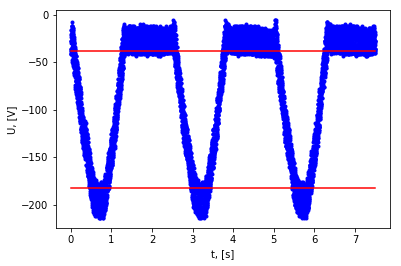

9    5    18-06-08 17_41_38_21.xlsx


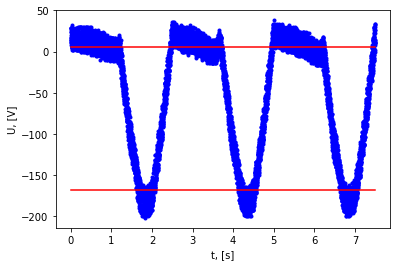

9    6    18-06-08 17_41_41_297.xlsx


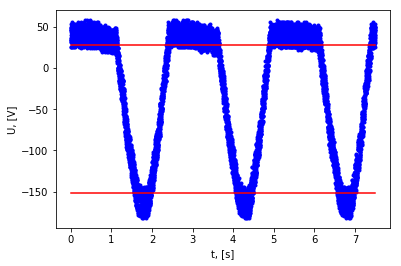

9    7    18-06-08 17_41_44_589.xlsx


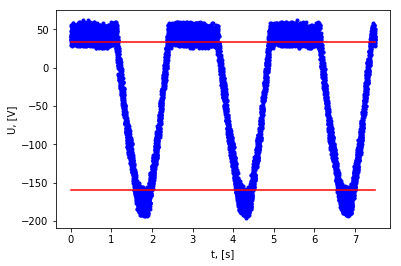

9    8    18-06-08 17_41_47_865.xlsx


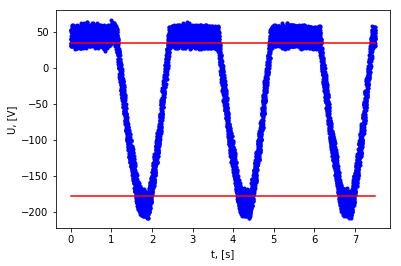

9    9    18-06-08 17_41_51_156.xlsx


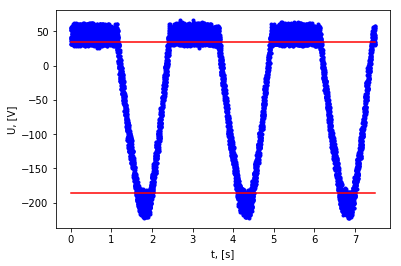

9    10    18-06-08 17_41_54_432.xlsx


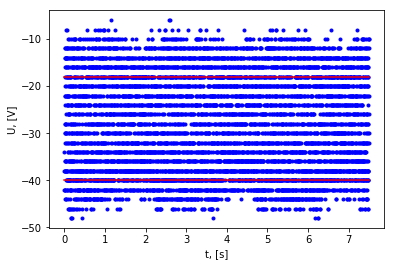

In [7]:
os.chdir(set_output) # Переходим в папку output
writer = pand.ExcelWriter('Results.xlsx') # Создаем эксель файл
# Создаем в dataframe modeData дополнительные столбцы
modeData['U_fl, [V]'] = None; modeData['deltaU_fl, [V]'] = None
modeData['U_pl, [V]'] = None; modeData['deltaU_pl, [V]'] = None
modeData['I, [A]'] = None; modeData['deltaI, [A]'] = None
# Проходимся по всем папкам, которые было указано выше обработать
for i in ind:
    names  = NamesList(modeData['name'][i], folder_name) # Получаем список экселек в данной папке
    os.chdir(set_input + '\\' + str(modeData['name'][i])) # Переходим в данную папку
    # Создаем dataframe, в которы будут записаны все полученные данные из папки name 
    out = pand.DataFrame(columns = ['U_fl, [V]', 'deltaU, [V]', 'I, [A]', 'deltaI, [A]'], index = range(0,len(names)))
    for k in range(len(names)):
        X, Y = openData(names[k], modeData['name'][i], folder_name, modeData['div'][i])
        minY, maxY = points(X, Y, sampleRate(Y))
        dYup = max(Y) - maxY # Погрешность, как отличие наивысшей точки от среднего значения верхнего положения
        dYdown = minY - min(Y) # Аналогичная погрешность для нижней части обрезанного синуса
        platoX, platoY, peakX, peakY = PlatoPeaks(minY, maxY, Y, X, dYup, dYdown)
        out['U_fl, [V]'][k] = maxY # Записываем значение плавающего потенциала
        out['deltaU, [V]'][k] = dYup # Записываем значение погрешности
        if ((maxY - minY) / 50. < 1): # Если услови выполнено, то никакого синуса, скорее всего, нет и на графике просто шум. Это величина потенциала без тока нагрева петли.
            out['I, [A]'][k] = Y.mean() / 50. # Делим на 50, т.к. всегда использовалось балластное сопротивление на 50 Ом
        else:
            out['I, [A]'][k] = (maxY - minY) / 50.
        out['deltaI, [A]'][k] = (dYup + dYdown) / 100.
        print modeData['name'][i], '  ', k, '  ', names[k]
        # Здесь можно выбрать какие графики строить, закомментировав тут или иную строчку.
        #draw(X, Y, platoX, platoY, peakX, peakY)
        draw1(X, Y, minY, maxY)
        os.chdir(set_output)
        # Если не требуется сохранять графики следующую строчку закомментировать
        save(str(modeData['name'][i]) + '_' + str(k), 'jpeg')
        plt.show()
    # Записываем значения плавающего потенциала, потенциала плазмы и ток нагрева + их погрешности.
    modeData.loc[i, 'U_fl, [V]'] = out['U_fl, [V]'][(abs(out['I, [A]']) < abs(out['I, [A]'][0]) + out['deltaI, [A]'][0]) & (abs(out['I, [A]']) > abs(out['I, [A]'][0]) - out['deltaI, [A]'][0])].mean()
    modeData.loc[i, 'deltaU_fl, [V]'] = out['deltaU, [V]'][(abs(out['I, [A]']) < abs(out['I, [A]'][0]) + out['deltaI, [A]'][0]) & (abs(out['I, [A]']) > abs(out['I, [A]'][0]) - out['deltaI, [A]'][0])].mean()
    modeData.loc[i, 'U_pl, [V]'] =  out['U_fl, [V]'][(out['U_fl, [V]'] > max(out['U_fl, [V]']) - out['deltaU, [V]'][out['U_fl, [V]'].argmax()])].mean()
    modeData.loc[i, 'deltaU_pl, [V]'] = out['deltaU, [V]'][(out['U_fl, [V]'] > max(out['U_fl, [V]']) - out['deltaU, [V]'][out['U_fl, [V]'].argmax()])].mean()
    modeData.loc[i, 'I, [A]'] = out['I, [A]'][(out['U_fl, [V]'] > max(out['U_fl, [V]']) - out['deltaU, [V]'][out['U_fl, [V]'].argmax()])].mean()
    modeData.loc[i, 'deltaI, [A]'] = out['deltaI, [A]'][(out['U_fl, [V]'] > max(out['U_fl, [V]']) - out['deltaU, [V]'][out['U_fl, [V]'].argmax()])].mean()
    # Записываем в итоговую эксельку на страницу с названием name данные полученные из одноименной папки в folder_name
    out.to_excel(writer, str(modeData['name'][i]))
# Записываем данные сводной таблицы на последнюю страницу эксельки 'modes'
modeData.to_excel(writer, sheet_name = 'modes')
writer.save() # Сохраняем эксельку